### Analyzing, visualizing and predicting local states in a localization problem
### Part-7: Predicting the range of outliers
In the previous notebooks ([Part-3](https://github.com/helalme/UncertaintiesReductionInLocalization/blob/master/2.%20TrainingAndPredictionOfQ1.ipynb), [Part-4](https://github.com/helalme/UncertaintiesReductionInLocalization/blob/master/3.%20TrainingAndPredictionOfQ2.ipynb), [Part-5](https://github.com/helalme/UncertaintiesReductionInLocalization/blob/master/4.%20TrainingAndPredictionOfQ3.ipynb), and [Part-6](https://github.com/helalme/UncertaintiesReductionInLocalization/blob/master/5.%20PredictingUpperAndLowerWhiskers.ipynb)), we have accurately predicted the series of boxes (i.e. Q1, Q2, Q3) and whiskers (i.e. 5th percentiles and 90th percentiles). In order to get the comprehensive idea about the local states of an SERVE, we will have to analyze and predict the range of outliers as well. Here we will show how to assesse the outliers in upper and the lower side.

#### Loading necessary packages

In [1]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import seaborn as sns

#### Loading the datasets

Original datasets were saven in xlsx, however, it is very slow to read from xlsx, so all xlsx datasets have been converted to txt 

In [2]:
data1=pd.read_csv('Data/S33-13g-20timestepsData.txt', delimiter="  ", header=None, engine='python' )
data2=pd.read_csv('Data/S33-50g-20timestepsData.txt', delimiter="  ", header=None, engine='python' )
data3=pd.read_csv('Data/S33-150g-20timestepsData.txt', delimiter="  ", header=None, engine='python' )
data4=pd.read_csv('Data/S33-300g-20timestepsData.txt', delimiter="  ", header=None, engine='python' )
data5=pd.read_csv('Data/S33-550g-20timestepsData.txt', delimiter="  ", header=None, engine='python' )
data6=pd.read_csv('Data/S33-900g-20timestepsData.txt', delimiter="  ", header=None, engine='python' )
data7=pd.read_csv('Data/S33-1400g-20timestepsData.txt', delimiter="  ", header=None, engine='python' )
data8=pd.read_csv('Data/S33-2000g-20timestepsData.txt', delimiter="  ", header=None, engine='python' )

#### Making summary of all the series

In [3]:
summary1=data1.describe()
summary2=data2.describe()
summary3=data3.describe()
summary4=data4.describe()
summary5=data5.describe()
summary6=data6.describe()
summary7=data7.describe()
summary8=data8.describe()

In [4]:
summary1

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19
count,14226.000000,14226.000000,14226.000000,14226.000000,14226.000000,14226.000000,14226.000000,14226.000000,14226.000000,14226.000000,14226.000000,14226.000000,14226.000000,14226.000000,14226.000000,14226.000000,14226.000000,14226.000000,14226.000000,14226.000000
mean,-68.014583,-96.527320,-117.443919,-133.899836,-147.049385,-157.593846,-166.056574,-172.849981,-178.303738,-182.682203,-148.191922,-113.008813,-77.269304,-41.083314,-4.538719,32.293722,69.357276,106.606454,144.004583,181.522395
std,33.586725,34.708674,35.890479,37.639233,39.600357,41.501398,43.214030,44.696406,45.949309,46.993014,48.417946,49.688619,50.829670,51.863129,52.808146,53.680816,54.494652,55.260668,55.987921,56.683894
min,-204.312500,-224.420800,-238.020800,-248.568700,-256.972900,-263.716700,-273.402100,-283.560400,-291.725000,-298.275000,-266.925000,-234.531200,-201.302100,-167.410400,-132.986300,-98.125200,-62.921800,-27.438300,8.268500,44.151300
25%,-85.828725,-118.019700,-142.183775,-161.474800,-176.838575,-189.231900,-199.059475,-207.430250,-214.077625,-219.419825,-186.100775,-152.007800,-117.154700,-81.729650,-45.994975,-9.851500,26.592700,63.308975,100.094050,137.084600
50%,-67.974200,-97.884550,-119.943650,-137.177100,-150.612350,-161.621950,-170.210550,-177.174200,-182.869550,-187.428200,-153.097500,-118.064600,-82.438300,-46.397700,-10.003250,26.785900,63.778150,100.961450,138.341200,175.798750
75%,-48.610650,-74.662625,-93.346225,-107.298800,-118.223950,-126.833025,-133.741600,-139.409200,-143.813700,-147.490675,-112.006200,-75.908675,-39.383250,-2.472350,34.782600,72.268825,109.954375,147.892775,185.877825,223.926075
max,142.049400,75.404600,47.738100,26.341100,19.372300,15.875400,13.066000,10.811100,9.004600,7.557100,46.607900,86.425800,127.208700,167.893300,208.502200,249.059900,289.559400,330.028800,370.458300,410.881300


#### If we see the minimum values of the local states at each timestep, i.e. minimum stresses of the first 6 sets, we see there is no trend, thus it is difficult to predict by a neural network

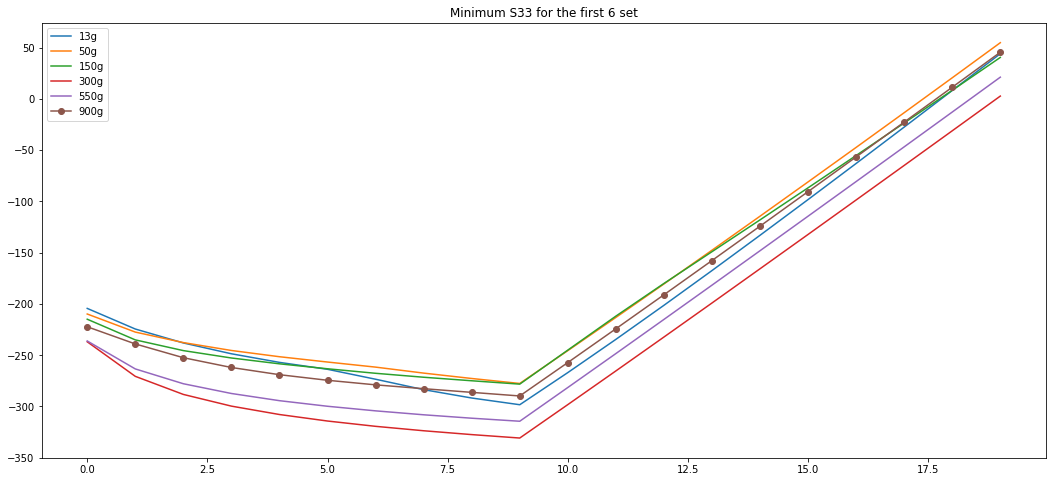

In [6]:
plt.figure(figsize=(18,8))
plt.plot(summary1.iloc[3,:], label='13g')
plt.plot(summary2.iloc[3,:], label='50g')
plt.plot(summary3.iloc[3,:], label='150g')
plt.plot(summary4.iloc[3,:], label='300g')
plt.plot(summary5.iloc[3,:], label='550g')
plt.plot(summary6.iloc[3,:], 'o-', label='900g')

plt.title('Minimum S33 for the first 6 set')

plt.legend()
plt.show()

#### If we see the maximum stresses for the 6 set, again we observe no sequencial relationship and high variance, making the prediction of further sets difficult

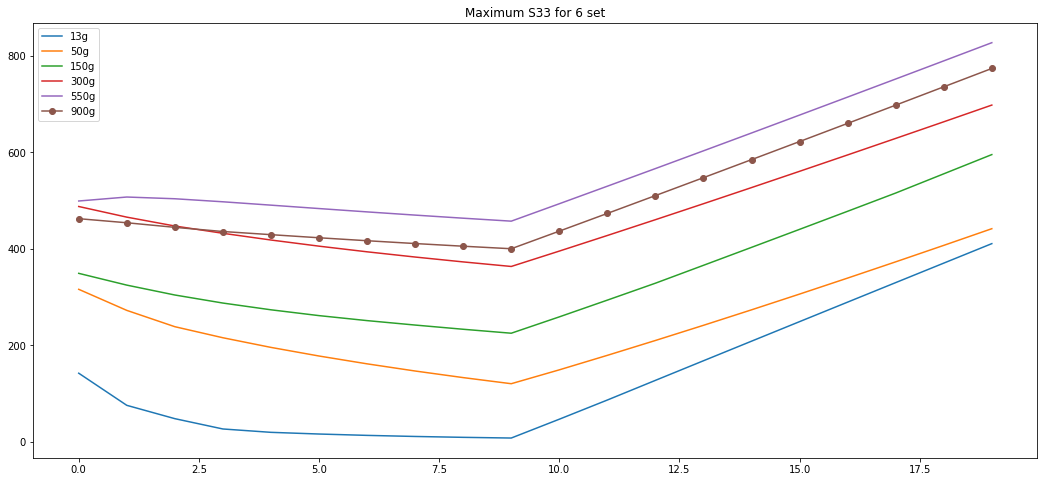

In [28]:
plt.figure(figsize=(18,8))
plt.plot(summary1.iloc[7,:], label='13g')
plt.plot(summary2.iloc[7,:], label='50g')
plt.plot(summary3.iloc[7,:], label='150g')
plt.plot(summary4.iloc[7,:], label='300g')
plt.plot(summary5.iloc[7,:], label='550g')
plt.plot(summary6.iloc[7,:], 'o-', label='900g')

plt.title('Maximum S33 for 6 set')
#plt.grid()
plt.legend()
plt.show()

#### Two plots above are indicating the list of maximum and minimum values of the 7th and 8th set could be anywhere closer to 3rd to 6th set

#### Instead of examining the end point of outliers, lets have a quick at the height of outliers at each timestep for the 6 set: Lowerside outliers height

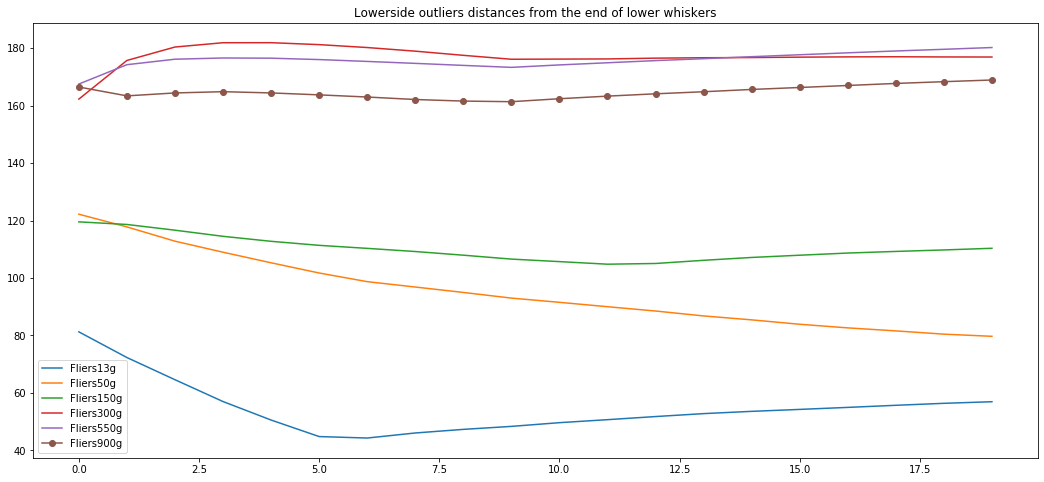

In [29]:
plt.figure(figsize=(18,8))

plt.plot(abs(data1.quantile(q=0.05)-summary1.iloc[3,:]),  label='Fliers13g')
plt.plot(abs(data2.quantile(q=0.05)-summary2.iloc[3,:]),  label='Fliers50g')
plt.plot(abs(data3.quantile(q=0.05)-summary3.iloc[3,:]),  label='Fliers150g')
plt.plot(abs(data4.quantile(q=0.05)-summary4.iloc[3,:]),  label='Fliers300g')
plt.plot(abs(data5.quantile(q=0.05)-summary5.iloc[3,:]),  label='Fliers550g')
plt.plot(abs(data6.quantile(q=0.05)-summary6.iloc[3,:]), 'o-', label='Fliers900g')

plt.title('Lowerside outliers distances from the end of lower whiskers')
#plt.grid()
plt.legend()
plt.show()

#### Above plot does not show a convincing sign for the prediction of the next sets. Lets have a look at the heights of uppersie outliers

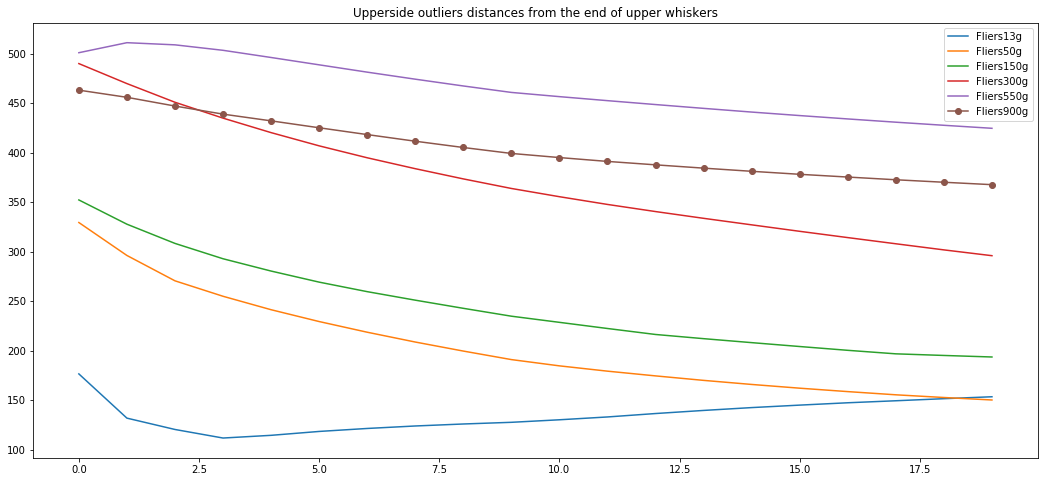

In [30]:
plt.figure(figsize=(18,8))

plt.plot(abs(data1.quantile(q=.9)-data1.quantile(q=1.)),  label='Fliers13g')
plt.plot(abs(data2.quantile(q=.9)-data2.quantile(q=1.)),  label='Fliers50g')
plt.plot(abs(data3.quantile(q=.9)-data3.quantile(q=1.)),  label='Fliers150g')
plt.plot(abs(data4.quantile(q=.9)-data4.quantile(q=1.)),  label='Fliers300g')
plt.plot(abs(data5.quantile(q=.9)-data5.quantile(q=1.)),  label='Fliers550g')
plt.plot(abs(data6.quantile(q=.9)-data6.quantile(q=1.)), 'o-', label='Fliers900g')

plt.title('Upperside outliers distances from the end of upper whiskers')
#plt.grid()
plt.legend()
plt.show()

#### The distances of outliers, both in upper and the lower side, are not giving a suitable functional relationship that can be accommodated by a neural network. 

#### Now lets extract the lower and upper outliers, i.e. 0 to 5th percentiles and 90 to 100th percentiles respectively. First extract the upper 10 percentiles

In [15]:
data1_Upper10P=data1[(data1 > data1.quantile(q=.9)).all(axis=1)]
data2_Upper10P=data2[(data2 > data2.quantile(q=.9)).all(axis=1)]
data3_Upper10P=data3[(data3 > data3.quantile(q=.9)).all(axis=1)]
data4_Upper10P=data4[(data4 > data4.quantile(q=.9)).all(axis=1)]
data5_Upper10P=data5[(data5 > data5.quantile(q=.9)).all(axis=1)]
data6_Upper10P=data6[(data6 > data6.quantile(q=.9)).all(axis=1)]
#data7_Upper10P=data7[(data7 > data7.quantile(q=.9)).all(axis=1)]
#data8_Upper10P=data8[(data8 > data8.quantile(q=.9)).all(axis=1)]

#### Lets have a look at unsorted upper 10 percentiles of the 6th set

In [18]:
data6_Upper10P

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19
98373,2.2428,2.1435,1.3738,0.4655,-0.2352,-0.5834,-0.5639,-0.2206,0.3850,1.1923,43.5350,85.9875,128.512,171.075,213.688,256.312,298.925,341.562,384.175,426.750
98435,2.3385,2.2800,1.5442,0.6729,0.0117,-0.2976,-0.2427,0.1311,0.7619,1.5890,43.9437,86.4013,128.925,171.512,214.113,256.725,299.337,341.963,384.537,427.137
101344,2.6234,2.5396,1.7285,0.7812,0.0542,-0.3183,-0.3315,-0.0354,0.5063,1.2336,43.3188,85.4963,127.750,170.025,212.350,254.662,296.975,339.275,381.588,423.875
104367,2.9503,2.8614,2.0027,1.0320,0.3162,-0.0214,0.0093,0.3488,0.9276,1.6833,43.7438,85.8950,128.088,170.338,212.587,254.850,297.088,339.338,381.563,423.800
104369,2.9192,2.8235,1.9598,0.9797,0.2447,-0.1251,-0.1389,0.1452,0.6600,1.3453,43.2688,85.2738,127.350,169.412,211.525,253.650,295.762,337.875,379.950,422.025
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
849288,188.3750,171.9500,157.6000,145.3880,134.8370,125.5500,117.3060,109.8330,103.0270,96.7938,129.1120,161.8120,194.875,228.225,261.875,295.713,329.763,364.025,398.438,433.025
849289,190.1500,174.0620,159.8500,147.6880,137.1620,127.9000,119.6440,112.1690,105.3840,99.1213,131.4750,164.2500,197.325,230.713,264.362,298.275,332.375,366.663,401.125,435.750
849290,192.3870,176.6620,162.5880,150.4750,140.0000,130.7500,122.4920,115.0170,108.2240,101.9840,134.3870,167.1750,200.275,233.713,267.438,301.375,335.500,369.850,404.337,439.000
849291,195.1880,179.8500,165.9370,153.9250,143.4630,134.2250,125.9770,118.5090,111.7140,105.4600,137.8880,170.7500,203.900,237.412,271.137,305.125,339.300,373.687,408.225,442.950


#### Lets sort the outliers and have a look a the sorted 6th set again

In [19]:
data1_Upper10P = pd.DataFrame(np.sort(data1_Upper10P.values, axis=0), index=data1_Upper10P.index, columns=data1_Upper10P.columns)
data2_Upper10P = pd.DataFrame(np.sort(data2_Upper10P.values, axis=0), index=data2_Upper10P.index, columns=data2_Upper10P.columns)
data3_Upper10P = pd.DataFrame(np.sort(data3_Upper10P.values, axis=0), index=data3_Upper10P.index, columns=data3_Upper10P.columns)
data4_Upper10P = pd.DataFrame(np.sort(data4_Upper10P.values, axis=0), index=data4_Upper10P.index, columns=data4_Upper10P.columns)
data5_Upper10P = pd.DataFrame(np.sort(data5_Upper10P.values, axis=0), index=data5_Upper10P.index, columns=data5_Upper10P.columns)
data6_Upper10P = pd.DataFrame(np.sort(data6_Upper10P.values, axis=0), index=data6_Upper10P.index, columns=data6_Upper10P.columns)
#data7_Upper10P = pd.DataFrame(np.sort(data7_Upper10P.values, axis=0), index=data7_Upper10P.index, columns=data7_Upper10P.columns)
#data8_Upper10P = pd.DataFrame(np.sort(data8_Upper10P.values, axis=0), index=data8_Upper10P.index, columns=data8_Upper10P.columns)

In [20]:
data6_Upper10P

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19
98373,-0.4337,-1.6515,-2.3357,-2.7775,-2.5768,-2.0252,-1.2762,-0.4344,0.3694,1.1321,42.4450,83.5063,124.463,165.213,205.613,246.000,286.300,326.587,366.875,406.737
98435,-0.4331,-1.6480,-2.3335,-2.7766,-2.5768,-2.0072,-1.2757,-0.4312,0.3785,1.1370,42.4588,83.5125,124.463,165.363,205.837,246.175,286.475,326.725,366.937,406.737
101344,-0.4331,-1.6440,-2.3289,-2.7725,-2.5671,-2.0040,-1.2621,-0.4158,0.3808,1.1375,42.4675,83.5125,124.525,165.363,206.238,247.025,287.450,327.850,367.350,406.738
104367,-0.4324,-1.6435,-2.3235,-2.7601,-2.5580,-2.0040,-1.2447,-0.4030,0.3824,1.1375,42.4887,83.6512,124.762,165.438,206.238,247.050,287.812,327.850,367.363,406.762
104369,-0.4324,-1.6414,-2.3209,-2.7484,-2.5580,-2.0004,-1.2370,-0.3997,0.3850,1.1375,42.5087,83.6775,124.787,165.538,206.500,247.050,287.812,327.875,367.388,406.787
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
849288,442.4500,441.0250,432.8630,424.0370,415.5120,406.6370,400.2870,393.7370,388.4380,383.3750,419.2120,455.3380,491.738,528.363,565.262,602.312,639.550,676.938,714.487,752.175
849289,444.8880,443.0750,433.2500,424.3630,416.2880,407.6000,400.6120,394.5130,389.0750,383.6000,420.5750,457.7250,494.200,530.725,567.337,604.038,640.812,677.712,714.662,752.538
849290,445.9380,445.7750,437.1880,426.9880,416.6630,408.7500,401.7120,395.1750,389.4000,384.9880,421.3630,457.7380,495.125,532.675,570.412,608.300,645.275,682.125,719.112,756.262
849291,451.7380,446.8500,442.3370,435.6250,427.2500,419.4500,412.1870,405.3630,398.9750,392.9620,428.2620,463.8370,499.700,535.788,572.087,608.587,646.300,684.438,722.675,761.038


#### Make a summary of upper 10 percentiles

In [21]:
summary1_Upper10P=data1_Upper10P.describe()
summary2_Upper10P=data2_Upper10P.describe()
summary3_Upper10P=data3_Upper10P.describe()
summary4_Upper10P=data4_Upper10P.describe()
summary5_Upper10P=data5_Upper10P.describe()
summary6_Upper10P=data6_Upper10P.describe()
#summary7_Upper10P=data7_Upper10P.describe()
#summary8_Upper10P=data8_Upper10P.describe()

In [22]:
summary6_Upper10P

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19
count,62268.000000,62268.000000,62268.000000,62268.000000,62268.000000,62268.000000,62268.000000,62268.000000,62268.000000,62268.000000,62268.000000,62268.000000,62268.000000,62268.000000,62268.000000,62268.000000,62268.000000,62268.000000,62268.000000,62268.000000
mean,61.444007,79.156753,88.572790,94.267037,97.933154,100.359881,101.969526,103.011224,103.642531,103.968135,144.359349,184.569641,224.637393,264.591303,304.453210,344.240434,383.966281,423.641786,463.275372,502.874473
std,66.716500,69.291332,69.632452,69.318564,68.713605,67.966954,67.155529,66.322277,65.491820,64.678097,63.978937,63.337960,62.755934,62.232125,61.765032,61.352757,60.993095,60.683707,60.422438,60.206990
min,-0.433700,-1.651500,-2.335700,-2.777500,-2.576800,-2.025200,-1.276200,-0.434400,0.369400,1.132100,42.445000,83.506300,124.463000,165.213000,205.613000,246.000000,286.300000,326.587000,366.875000,406.737000
25%,9.097125,27.097175,38.910900,46.431875,51.418450,55.100675,57.721575,59.599375,60.856275,61.512200,101.805500,141.537750,180.884000,220.297000,259.534750,298.872000,337.950000,377.287000,416.675000,456.025000
50%,38.563100,63.368750,75.854400,83.080600,87.535000,90.153150,91.841250,92.762500,93.441250,93.862500,134.462000,174.975000,215.388000,255.700000,296.012000,336.275000,376.600000,416.775000,456.887000,497.044000
75%,94.581200,113.058500,121.028750,125.612250,128.741000,130.890500,132.528000,133.603000,134.200000,134.713000,175.463000,216.066000,256.450000,296.766000,336.913000,377.012000,417.050000,456.988000,496.875000,536.753250
max,462.638000,454.188000,444.688000,436.038000,429.488000,423.050000,416.912000,411.062000,405.525000,400.288000,436.813000,473.575000,510.562000,547.775000,585.150000,622.688000,660.400000,698.237000,736.238000,774.325000


#### Lets do the same thing for the lower 5 percentiles

In [23]:
data1_Lower5P=data1[(data1 < data1.quantile(q=.05)).all(axis=1)]
data2_Lower5P=data2[(data2 < data2.quantile(q=.05)).all(axis=1)]
data3_Lower5P=data3[(data3 < data3.quantile(q=.05)).all(axis=1)]
data4_Lower5P=data4[(data4 < data4.quantile(q=.05)).all(axis=1)]
data5_Lower5P=data5[(data5 < data5.quantile(q=.05)).all(axis=1)]
data6_Lower5P=data6[(data6 < data6.quantile(q=.05)).all(axis=1)]
#data7_Lower5P=data7[(data7 < data7.quantile(q=.05)).all(axis=1)]
#data8_Lower5P=data8[(data8 < data8.quantile(q=.05)).all(axis=1)]

In [24]:
data1_Lower5P = pd.DataFrame(np.sort(data1_Lower5P.values, axis=0), index=data1_Lower5P.index, columns=data1_Lower5P.columns)
data2_Lower5P = pd.DataFrame(np.sort(data2_Lower5P.values, axis=0), index=data2_Lower5P.index, columns=data2_Lower5P.columns)
data3_Lower5P = pd.DataFrame(np.sort(data3_Lower5P.values, axis=0), index=data3_Lower5P.index, columns=data3_Lower5P.columns)
data4_Lower5P = pd.DataFrame(np.sort(data4_Lower5P.values, axis=0), index=data4_Lower5P.index, columns=data4_Lower5P.columns)
data5_Lower5P = pd.DataFrame(np.sort(data5_Lower5P.values, axis=0), index=data5_Lower5P.index, columns=data5_Lower5P.columns)
data6_Lower5P = pd.DataFrame(np.sort(data6_Lower5P.values, axis=0), index=data6_Lower5P.index, columns=data6_Lower5P.columns)
#data7_Lower5P = pd.DataFrame(np.sort(data7_Lower5P.values, axis=0), index=data7_Lower5P.index, columns=data7_Lower5P.columns)
#data8_Lower5P = pd.DataFrame(np.sort(data8_Lower5P.values, axis=0), index=data8_Lower5P.index, columns=data8_Lower5P.columns)


In [25]:
summary1_Lower5P=data1_Lower5P.describe()
summary2_Lower5P=data2_Lower5P.describe()
summary3_Lower5P=data3_Lower5P.describe()
summary4_Lower5P=data4_Lower5P.describe()
summary5_Lower5P=data5_Lower5P.describe()
summary6_Lower5P=data6_Lower5P.describe()
#summary7_Lower5P=data7_Lower5P.describe()
#summary8_Lower5P=data8_Lower5P.describe()

In [26]:
data6_Lower5P

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19
371181,-222.2250,-238.9750,-252.4000,-261.9500,-268.975,-274.425,-278.887,-282.625,-286.213,-289.725,-257.1250,-224.2000,-191.0250,-157.6270,-124.0710,-90.3638,-56.5300,-22.5800,11.4591,45.5750
373239,-218.3750,-237.8750,-251.7630,-261.1750,-268.062,-273.438,-277.812,-282.188,-285.887,-288.762,-255.6380,-222.3000,-188.7620,-155.0750,-121.2250,-87.2875,-53.2512,-19.1360,15.0539,49.3075
373561,-217.9750,-237.4500,-249.0620,-258.2750,-265.012,-271.837,-277.500,-281.550,-284.750,-287.600,-254.4500,-221.0880,-187.5370,-153.8500,-120.0250,-86.0913,-52.0663,-17.9600,16.2136,49.9181
373562,-211.0750,-234.9870,-248.2630,-257.8370,-264.850,-270.363,-274.825,-278.587,-281.863,-284.738,-251.5370,-218.1120,-184.4750,-150.6750,-116.7500,-83.4175,-50.0962,-16.6379,16.9380,50.4525
373563,-210.8250,-233.7870,-247.0750,-255.7500,-264.825,-270.275,-274.588,-278.225,-281.400,-284.200,-250.9750,-217.5880,-183.9750,-150.2370,-116.5750,-82.7313,-48.6038,-14.3971,17.8110,50.6175
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
848967,-55.7587,-77.3913,-89.7287,-98.4638,-105.515,-111.650,-117.037,-121.375,-125.225,-128.675,-95.1050,-61.2413,-27.2800,6.7489,40.9650,75.2625,109.7040,144.3620,179.2130,214.4880
849013,-55.7575,-77.1150,-89.5500,-98.3950,-105.475,-111.612,-117.000,-121.337,-125.200,-128.638,-94.9700,-61.1850,-27.2100,6.7979,41.0870,75.3513,109.8860,144.4880,179.3380,214.4880
849014,-55.7550,-76.9475,-89.2300,-98.0225,-105.325,-111.564,-116.968,-121.275,-125.100,-128.488,-94.8825,-61.0988,-27.2100,6.9254,41.1209,75.3812,109.9040,144.5490,179.3500,214.4880
849015,-55.7500,-76.4463,-89.0563,-97.7562,-105.295,-111.500,-116.925,-121.262,-125.000,-128.363,-94.7950,-61.0050,-27.1498,6.9850,41.1850,75.5100,109.9160,144.7000,179.5750,214.4880


In [27]:
summary6_Lower5P

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19
count,33202.000000,33202.000000,33202.000000,33202.000000,33202.000000,33202.000000,33202.000000,33202.000000,33202.000000,33202.000000,33202.000000,33202.000000,33202.000000,33202.000000,33202.000000,33202.000000,33202.000000,33202.000000,33202.000000,33202.000000
mean,-99.885089,-125.373166,-139.796570,-149.612232,-156.948383,-162.759632,-167.552254,-171.624259,-175.164333,-178.298641,-144.210284,-109.867432,-75.317203,-40.594803,-5.727661,29.262764,64.359381,99.548384,134.818684,170.160750
std,28.814098,26.931654,26.407714,26.345823,26.437639,26.574101,26.715350,26.846823,26.964034,27.066830,27.403576,27.742282,28.083442,28.427430,28.774905,29.126231,29.481667,29.841412,30.205698,30.574446
min,-222.225000,-238.975000,-252.400000,-261.950000,-268.975000,-274.425000,-278.887000,-282.625000,-286.213000,-289.725000,-257.125000,-224.200000,-191.025000,-157.627000,-124.071000,-90.363800,-56.530000,-22.580000,11.459100,45.575000
25%,-117.150000,-141.559000,-156.250000,-166.496750,-174.334000,-180.584750,-185.862750,-190.300000,-194.175000,-197.587000,-164.059000,-130.250000,-96.333725,-62.322500,-27.941900,6.459750,40.969050,75.696200,110.458500,145.428250
50%,-98.312500,-121.600000,-135.350000,-145.237000,-152.912000,-159.050000,-163.950000,-168.137000,-171.500000,-174.525000,-140.306000,-105.698500,-70.951250,-36.064350,-0.978550,34.133800,69.273100,104.537500,139.912000,175.331500
75%,-76.385900,-104.957500,-120.437000,-130.025000,-136.400000,-141.400000,-145.650000,-149.312000,-152.613000,-155.575000,-121.075000,-86.364725,-51.438125,-16.382500,18.774100,54.147500,89.537800,125.025000,160.600000,196.325000
max,-55.746200,-75.916200,-87.997500,-97.405000,-104.696000,-111.162000,-116.587000,-120.912000,-124.975000,-128.363000,-94.765000,-60.962500,-26.976300,7.074300,41.208800,75.608800,110.209000,144.887000,179.612000,214.488000


#### So far we have separated the outliers, i.e. lower 5P and upper 10P, then we have sorted all the 6 datasets. Now lets visualize the lower 5P and upper 10P for the 6th set

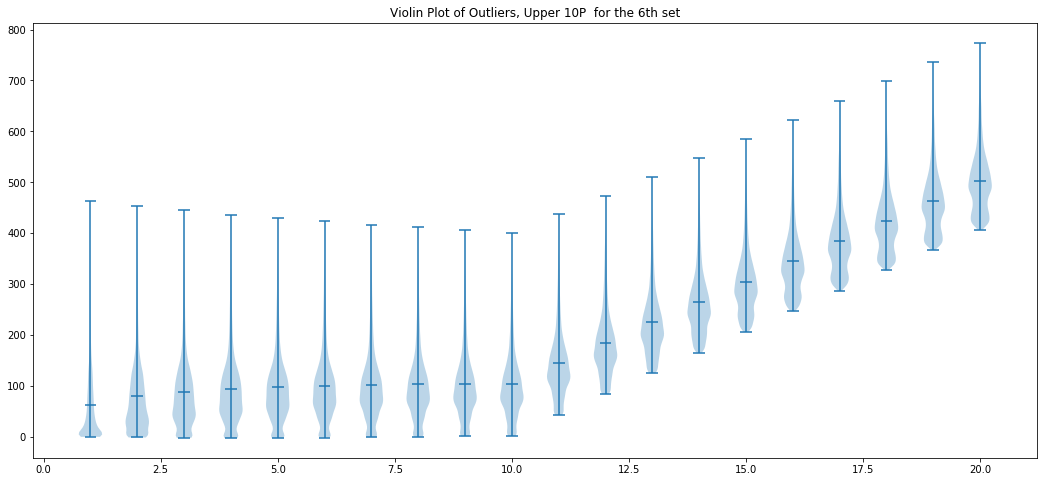

In [31]:
fig, axes = plt.subplots(figsize=(18,8))
axes.violinplot(dataset = [data6_Upper10P.iloc[:,i] for i in range(data6_Upper10P.shape[1])],showmeans=True)
plt.title('Violin Plot of Outliers, Upper 10P  for the 6th set')
plt.show()

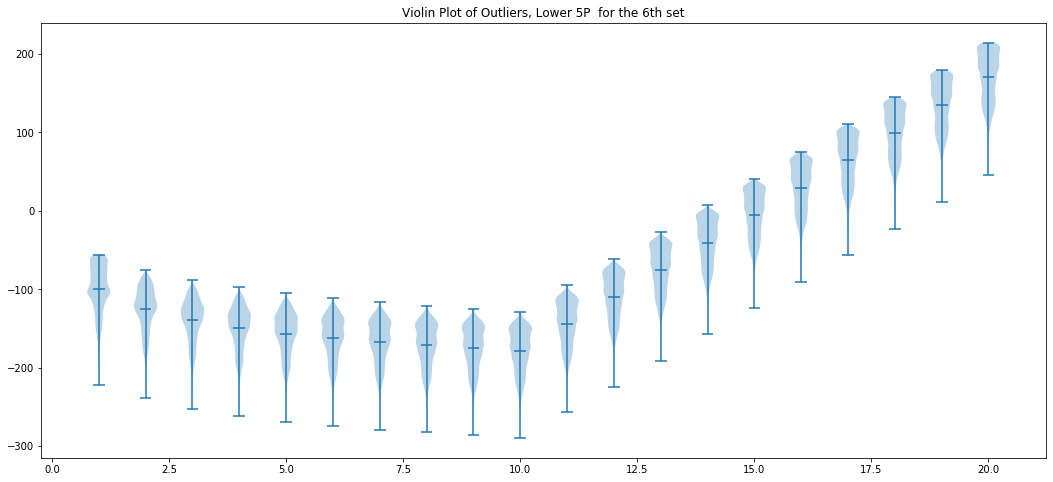

In [32]:
fig, axes = plt.subplots(figsize=(18,8))
axes.violinplot(dataset = [data6_Lower5P.iloc[:,i] for i in range(data6_Lower5P.shape[1])],showmeans=True)
plt.title('Violin Plot of Outliers, Lower 5P  for the 6th set')
plt.show()

#### So far we have analyzed and visualized the list of outliers for the first 6 sets, however, we did not observe any meaningful pattern for the prediction of the 7th and 8th set's outliers.

By observing the first four plots of Max and Min, we can easily guess that the outliers of 7th and 8th set would be closer to 4th, 5th and 6th sets. At this point, We will simply take the mean and standard deviations of these 3 sets. Then we will consider the region of 95% confidence interval, i.e. $\mu_{max}+1.96\sigma_{max}$ for the limit of upper whiskers and $\mu_{min}-1.96\sigma_{min}$ for the lower whiskers. We can expect with 95% confidence that the max and min of the 7th and 8th sets will be within these regions.

#### Lets see the predicted region of upper whiskers and compare with the simulate data

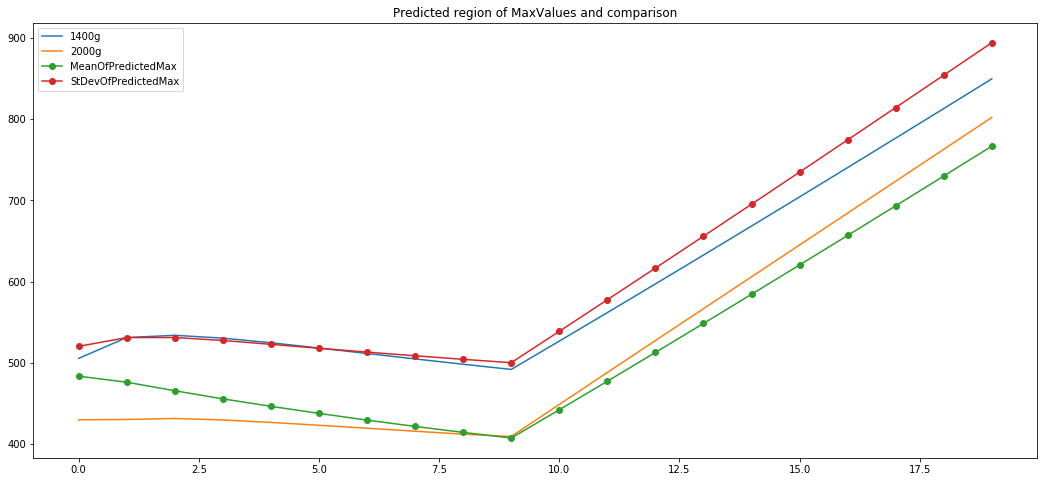

In [44]:
Max4_to_6 = pd.DataFrame({'max4th': summary4.iloc[7,:],'max5th': summary5.iloc[7,:],'max6th': summary6.iloc[7,:]})
MeanOfMax4_to_6 = (summary4.iloc[7,:]+summary5.iloc[7,:]+summary6.iloc[7,:])/3
stDevOfMax4_to_6 = Max4_to_6.std(axis=1)

plt.figure(figsize=(18,8))

plt.plot(summary7.iloc[7,:], label='1400g')
plt.plot(summary8.iloc[7,:], label='2000g')
plt.plot(MeanOfMax4_to_6, 'o-', label='MeanOfPredictedMax')
plt.plot(MeanOfMax4_to_6+1.96*stDevOfMax4_to_6, 'o-', label='StDevOfPredictedMax')

plt.title('Predicted region of MaxValues and comparison')

plt.legend()
plt.show()


#### Now see the predicted regions of lower whiskers and compare with the simulated data

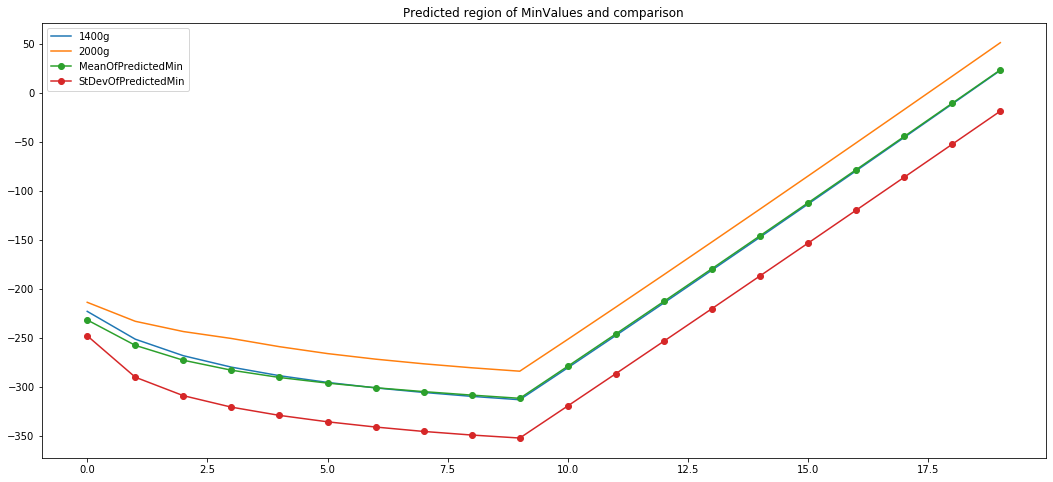

In [45]:
Min4_to_6 = pd.DataFrame({'min4th': summary4.iloc[3,:],'min5th': summary5.iloc[3,:],'min6th': summary6.iloc[3,:]})
MeanOfMin4_to_6 = (summary4.iloc[3,:]+summary5.iloc[3,:]+summary6.iloc[3,:])/3
stDevOfMin4_to_6 = Min4_to_6.std(axis=1)

plt.figure(figsize=(18,8))

plt.plot(summary7.iloc[3,:], label='1400g')
plt.plot(summary8.iloc[3,:], label='2000g')
plt.plot(MeanOfMin4_to_6, 'o-', label='MeanOfPredictedMin')
plt.plot(MeanOfMin4_to_6-1.96*stDevOfMin4_to_6, 'o-', label='StDevOfPredictedMin')

plt.title('Predicted region of MinValues and comparison')

plt.legend()
plt.show()

####  In this notebook it has been shown that the Max and Min values at each timestep for the first 6 datasets do not hold a meaningful pattern by which 7th and 8th set's Max-Min can be predicted. That's why we took the $\mu$ and $\sigma$ from the Max and Min serieses. At the end we have seen that the Max and Min series of 7th and 8th set lie within the predicted regions, i.e. within  $\mu_{max}+1.96\sigma_{max}$ for the limit of upper ouliers and $\mu_{min}-1.96\sigma_{min}$ for the lower ouliers.

### At the end we can say that, for a specific property of a material, we can effectively predict homogenized and local properties of an SERVE avoiding large numerical simulations.